In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
from datetime import datetime

In [2]:
# Load / Check the dataset (train_data)
train_data = pd.read_csv('../data/train.csv')
train_data.head()

,id,Datum,Warengruppe,Umsatz
0,1307011,2013-07-01,1,148.828353
1,1307021,2013-07-02,1,159.793757
2,1307031,2013-07-03,1,111.885594
3,1307041,2013-07-04,1,168.864941
4,1307051,2013-07-05,1,171.280754


In [3]:
train_data['Umsatz'].describe()

count    9334.000000
mean      206.749044
std       144.545189
min         7.051201
25%        96.897441
50%       161.900831
75%       280.644663
max      1879.461831
Name: Umsatz, dtype: float64

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           9334 non-null   int64  
 1   Datum        9334 non-null   object 
 2   Warengruppe  9334 non-null   int64  
 3   Umsatz       9334 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 291.8+ KB


In [5]:
# Load / Check the dataset (wetter)
wetter = pd.read_csv('../data/wetter.csv')
wetter.head()

,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,2012-01-01,8.0,9.8250,14,58.0
1,2012-01-02,7.0,7.4375,12,NaN
2,2012-01-03,8.0,5.5375,18,63.0
3,2012-01-04,4.0,5.6875,19,80.0
4,2012-01-05,6.0,5.3000,23,80.0


In [6]:
wetter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601 entries, 0 to 2600
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datum                2601 non-null   object 
 1   Bewoelkung           2591 non-null   float64
 2   Temperatur           2601 non-null   float64
 3   Windgeschwindigkeit  2601 non-null   int64  
 4   Wettercode           1932 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 101.7+ KB


In [7]:
# Load / Check the dataset (kiwo)
kiwo = pd.read_csv('../data/kiwo.csv')
kiwo.head()

,Datum,KielerWoche
0,2012-06-16,1
1,2012-06-17,1
2,2012-06-18,1
3,2012-06-19,1
4,2012-06-20,1


In [8]:
kiwo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Datum        72 non-null     object
 1   KielerWoche  72 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


Merge three dataset columns into the train data. 
(1-1) Wetter (Bewoelkung, Temperatur, Windgeschwindigkeit, Wettercode) 
(1-2) Kiwo (KielerWoche)

After merge, 
(2-1) Visualize datasets(scatter) 
(2-2) Treat missing data(Bewoelkung, Wettercode, KielerWoche) 
*KielerWoche --> Non-KielerWoche flag is set to 0

In [9]:
# Merge train data, wetter, and kiwo
# Since cannot merge multiple datasets at once, merge them in two phases.
# (first: train_data + wetter, second: train_data2 + kiwo)
train_data2 = train_data.merge(wetter, how = 'left', on = 'Datum')
train_data2 = train_data2.merge(kiwo, how = 'left', on = 'Datum')

In [10]:
train_data2.head()

,id,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche
0,1307011,2013-07-01,1,148.828353,6.0,17.8375,15.0,20.0,NaN
1,1307021,2013-07-02,1,159.793757,3.0,17.3125,10.0,NaN,NaN
2,1307031,2013-07-03,1,111.885594,7.0,21.0750,6.0,61.0,NaN
3,1307041,2013-07-04,1,168.864941,7.0,18.8500,7.0,20.0,NaN
4,1307051,2013-07-05,1,171.280754,5.0,19.9750,12.0,NaN,NaN


In [11]:
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9334 non-null   int64  
 1   Datum                9334 non-null   object 
 2   Warengruppe          9334 non-null   int64  
 3   Umsatz               9334 non-null   float64
 4   Bewoelkung           9264 non-null   float64
 5   Temperatur           9318 non-null   float64
 6   Windgeschwindigkeit  9318 non-null   float64
 7   Wettercode           7009 non-null   float64
 8   KielerWoche          223 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 656.4+ KB


Check relevance between "Umsatz" and Temperatur/Windgeschwindigkeit by scatter plot.

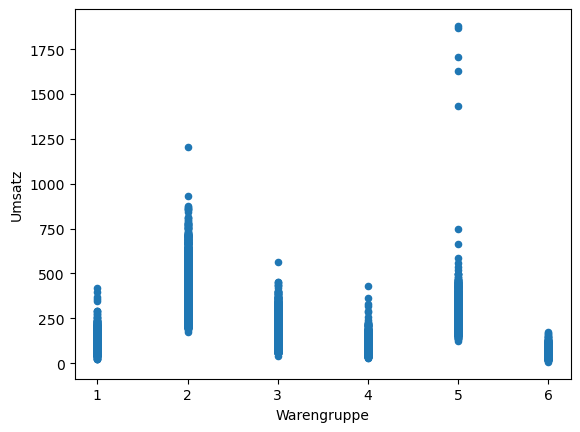

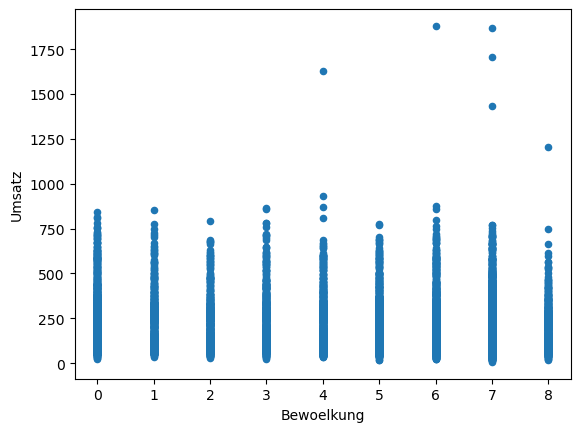

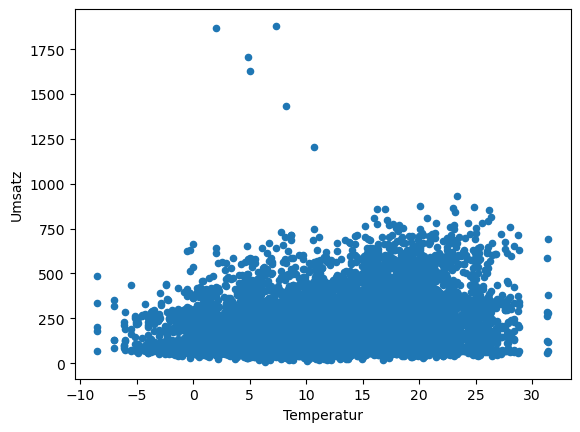

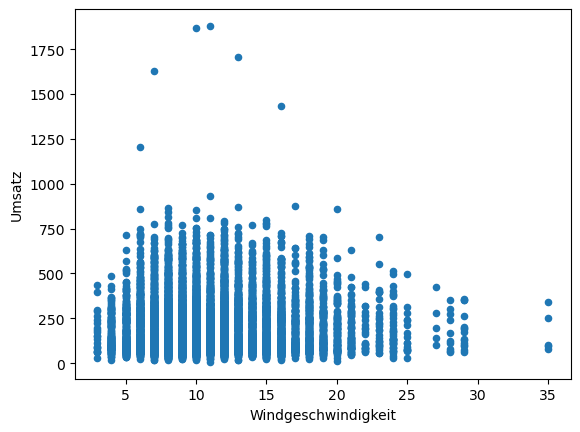

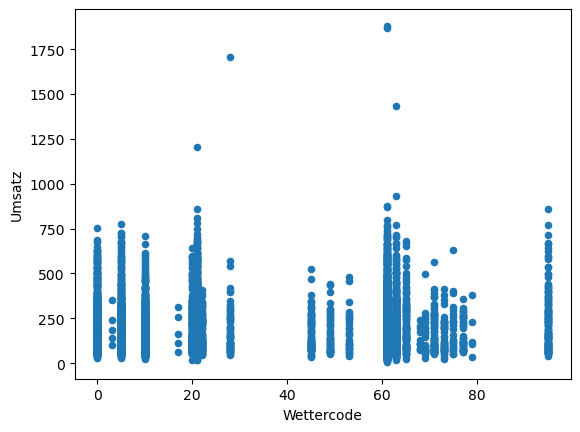

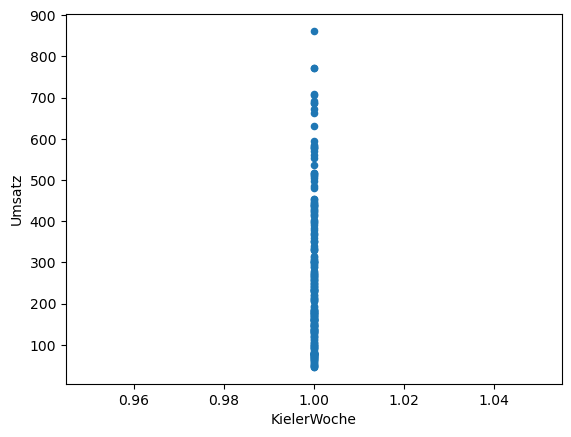

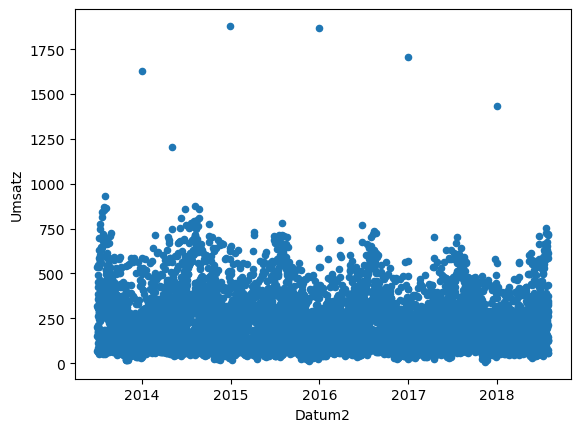

In [12]:
# Check numerical data distribution
train_data2['Datum2'] = pd.to_datetime(train_data2['Datum'])

for name in train_data2.columns:
    if name == 'id' or name == 'Datum' or name == 'Umsatz':
        continue
    train_data2.plot(kind = 'scatter', x = name, y = 'Umsatz');
    plt.show()

It seems that six outlier data points are over 1000 Umsatz. Extract them to identify what type of data.

In [13]:
outlier = train_data2[train_data2['Umsatz'] > 1000]
outlier

,id,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche,Datum2
2119,1405052,2014-05-05,2,1203.431130,8.0,10.7125,6.0,21.0,NaN,2014-05-05
7403,1312315,2013-12-31,5,1625.690601,4.0,5.0375,7.0,NaN,NaN,2013-12-31
7760,1412315,2014-12-31,5,1879.461831,6.0,7.3750,11.0,61.0,NaN,2014-12-31
8120,1512315,2015-12-31,5,1869.937723,7.0,2.0000,10.0,61.0,NaN,2015-12-31
8476,1612315,2016-12-31,5,1705.144205,7.0,4.8750,13.0,28.0,NaN,2016-12-31
8833,1712315,2017-12-31,5,1432.422347,7.0,8.2500,16.0,63.0,NaN,2017-12-31


While the five data are the last day of the year, the other one is '2014-05-05'. The last day of the year may be relevant to the result, so consider creating a new feature value later. Delete '2014-05-05'(index:2119) as it seems to be an outlier.

In [14]:
train_data3 = train_data2.drop(2119 , axis = 0)

In [15]:
train_data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9333 entries, 0 to 9333
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   9333 non-null   int64         
 1   Datum                9333 non-null   object        
 2   Warengruppe          9333 non-null   int64         
 3   Umsatz               9333 non-null   float64       
 4   Bewoelkung           9263 non-null   float64       
 5   Temperatur           9317 non-null   float64       
 6   Windgeschwindigkeit  9317 non-null   float64       
 7   Wettercode           7008 non-null   float64       
 8   KielerWoche          223 non-null    float64       
 9   Datum2               9333 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 802.1+ KB


Treat missing data.
I can see three columns(Bewoelkung, Wettercode, KielerWoche) before merging, but I found Temperatur and Windgeschwindigkeit also have missing data.
Check missing data and decide what to do for them. 

4 Bewoelkung 9263 non-null float64
5 Temperatur 9317 non-null float64
6 Windgeschwindigkeit 9317 non-null float64
7 Wettercode 7008 non-null float64
8 KielerWoche 223 non-null float64

In [16]:
# KielerWoche --> Non-KielerWoche flag is set to 0
train_data3['KielerWoche'] = train_data3['KielerWoche'].fillna(0)

In [17]:
# Bewoelkung/Temperatur/Windgeschwindigkeit/Wettercode
# Check missing data date

print("Bewoelkung")
print(train_data3[train_data3['Bewoelkung'].isnull()]['Datum'].drop_duplicates())

Bewoelkung
1236    2016-12-11
1526    2017-10-04
1527    2017-10-05
1551    2017-10-30
1552    2017-11-01
1553    2017-11-02
1554    2017-11-03
1555    2017-11-04
1556    2017-11-05
1557    2017-11-06
1558    2017-11-07
1559    2017-11-08
Name: Datum, dtype: object


In [18]:
print("Temperatur")
print(train_data3[train_data3['Temperatur'].isnull()]['Datum'].drop_duplicates())

Temperatur
1236    2016-12-11
1526    2017-10-04
1527    2017-10-05
Name: Datum, dtype: object


In [19]:
print("Windgeschwindigkeit")
print(train_data3[train_data3['Windgeschwindigkeit'].isnull()]['Datum'].drop_duplicates())

Windgeschwindigkeit
1236    2016-12-11
1526    2017-10-04
1527    2017-10-05
Name: Datum, dtype: object


In [20]:
print("Wettercode")
print(train_data3[train_data3['Wettercode'].isnull()]['Datum'].drop_duplicates())

Wettercode
1       2013-07-02
4       2013-07-05
5       2013-07-06
6       2013-07-07
8       2013-07-09
           ...    
1804    2018-07-17
1806    2018-07-19
1810    2018-07-23
1816    2018-07-29
1818    2018-07-31
Name: Datum, Length: 459, dtype: object


In [21]:
# 2016-12-11 / 2017-10-04 / 2017-10-05 are commonly missing
# Check if it exists in wetter
print(wetter[wetter['Datum'] == "2016-12-11"].index)
print(wetter[wetter['Datum'] == "2017-10-04"].index)
print(wetter[wetter['Datum'] == "2017-10-05"].index)

Index([], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')


Since these three dates(2016-12-11 / 2017-10-04 / 2017-10-05) did not exist initially, remove them from train_data3.

In [22]:
train_data4 = train_data3[~train_data3['Datum'].isin(["2016-12-11", "2017-10-04", "2017-10-05"])]
train_data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9317 entries, 0 to 9333
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   9317 non-null   int64         
 1   Datum                9317 non-null   object        
 2   Warengruppe          9317 non-null   int64         
 3   Umsatz               9317 non-null   float64       
 4   Bewoelkung           9263 non-null   float64       
 5   Temperatur           9317 non-null   float64       
 6   Windgeschwindigkeit  9317 non-null   float64       
 7   Wettercode           7008 non-null   float64       
 8   KielerWoche          9317 non-null   float64       
 9   Datum2               9317 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 800.7+ KB


Resolved missing data in Temperatur and Windgeschwindigkeit.

As for Bewoelkung / Wettercode, predict them with other climate columns (Temperatur/Windgeschwindigkeit). 
At first, predict Bewoelkung from Temperatur/Windgeschwindigkeit, then, predict Wettercode from Temperatur/Windgeschwindigkeit/Bewoelkung.

Use DecisionTreeClassifier because both of them are classification data. In this case, skip both splitting train/test data and exploring the best model.

In [23]:
# Extract 'Bewoelkung' missing data
cond_fillBe = train_data4['Bewoelkung'].isnull()
non_fillBe = train_data4.loc[cond_fillBe]
fillBe = non_fillBe.loc[:, ['Temperatur', 'Windgeschwindigkeit']]

# Delete 'Bewoelkung' missing data
train_fillBe = train_data4.dropna(subset=['Bewoelkung'])
X_fillBe = train_fillBe[['Temperatur', 'Windgeschwindigkeit']]
y_fillBe = train_fillBe[['Bewoelkung']]

# Predict missing 'Bewoelkung' data
from sklearn.tree import DecisionTreeClassifier

model_fillBe = DecisionTreeClassifier(max_depth = 5, random_state = 0, class_weight ='balanced')
model_fillBe.fit(X_fillBe, y_fillBe)
pred_fillBe = model_fillBe.predict(fillBe)

train_data4.loc[cond_fillBe, 'Bewoelkung'] = pred_fillBe

In [24]:
train_data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9317 entries, 0 to 9333
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   9317 non-null   int64         
 1   Datum                9317 non-null   object        
 2   Warengruppe          9317 non-null   int64         
 3   Umsatz               9317 non-null   float64       
 4   Bewoelkung           9317 non-null   float64       
 5   Temperatur           9317 non-null   float64       
 6   Windgeschwindigkeit  9317 non-null   float64       
 7   Wettercode           7008 non-null   float64       
 8   KielerWoche          9317 non-null   float64       
 9   Datum2               9317 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 800.7+ KB


In [25]:
# Extract 'Wettercode' missing data
cond_fillWe = train_data4['Wettercode'].isnull()
non_fillWe = train_data4.loc[cond_fillWe]
fillWe = non_fillWe.loc[:, ['Bewoelkung', 'Temperatur', 'Windgeschwindigkeit']]

# Delete 'Wettercode' missing data
train_fillWe = train_data4.dropna(subset=['Wettercode'])
X_fillWe = train_fillWe[['Bewoelkung', 'Temperatur', 'Windgeschwindigkeit']]
y_fillWe = train_fillWe[['Wettercode']]

# Predict missing 'Wettercode' data
# from sklearn.tree import DecisionTreeClassifier

model_fillWe = DecisionTreeClassifier(max_depth = 5, random_state = 0, class_weight ='balanced')
model_fillWe.fit(X_fillWe, y_fillWe)
pred_fillWe = model_fillWe.predict(fillWe)

train_data4.loc[cond_fillWe, 'Wettercode'] = pred_fillWe

In [26]:
train_data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9317 entries, 0 to 9333
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   9317 non-null   int64         
 1   Datum                9317 non-null   object        
 2   Warengruppe          9317 non-null   int64         
 3   Umsatz               9317 non-null   float64       
 4   Bewoelkung           9317 non-null   float64       
 5   Temperatur           9317 non-null   float64       
 6   Windgeschwindigkeit  9317 non-null   float64       
 7   Wettercode           9317 non-null   float64       
 8   KielerWoche          9317 non-null   float64       
 9   Datum2               9317 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 800.7+ KB


Completed treatment of the missing value. Then, change some feature values.

In [27]:
# Change 'Datum2' into 'Year'/'Month'/'Day'
train_data4['Year'] = train_data4['Datum2'].dt.year
train_data4['Month'] = train_data4['Datum2'].dt.month
train_data4['Day'] = train_data4['Datum2'].dt.day

/var/folders/v7/gyj7_4r90yj498l4d9f_2ggw0000gn/T/ipykernel_686/2763324543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data4['Year'] = train_data4['Datum2'].dt.year
/var/folders/v7/gyj7_4r90yj498l4d9f_2ggw0000gn/T/ipykernel_686/2763324543.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data4['Month'] = train_data4['Datum2'].dt.month
/var/folders/v7/gyj7_4r90yj498l4d9f_2ggw0000gn/T/ipykernel_686/2763324543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [28]:
# Create train_data5 for final train data
train_data5 = train_data4.drop(columns=['id', 'Datum', 'Datum2'])

According to the dataset description, Warengruppe/Wettercode are numbers(int64/float64), but they should be categorical data. Therefore, need to convert the following into one-hot encoding (using pd.get_dummies).

In [29]:
train_data5 = pd.get_dummies(train_data5, columns = ['Warengruppe', 'Wettercode'] ,drop_first = False, dtype = int)
train_data5.shape

(9317, 37)

In [30]:
train_data5.to_csv('../data/train_data5.csv', index=False)
train_data5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9317 entries, 0 to 9333
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Umsatz               9317 non-null   float64
 1   Bewoelkung           9317 non-null   float64
 2   Temperatur           9317 non-null   float64
 3   Windgeschwindigkeit  9317 non-null   float64
 4   KielerWoche          9317 non-null   float64
 5   Year                 9317 non-null   int32  
 6   Month                9317 non-null   int32  
 7   Day                  9317 non-null   int32  
 8   Warengruppe_1        9317 non-null   int64  
 9   Warengruppe_2        9317 non-null   int64  
 10  Warengruppe_3        9317 non-null   int64  
 11  Warengruppe_4        9317 non-null   int64  
 12  Warengruppe_5        9317 non-null   int64  
 13  Warengruppe_6        9317 non-null   int64  
 14  Wettercode_0.0       9317 non-null   int64  
 15  Wettercode_3.0       9317 non-null   int64 

Identify the important feature values by the correlation coefficient.

In [31]:
train_data5_corr = train_data5.corr().loc['Umsatz', 'Bewoelkung':].abs().sort_values(ascending=False)
train_data5_corr.to_csv('../data/train_data5_corr.csv', index=True)

In [32]:
# Create function
def model_linear_func(train_data, feature_list):
    X = train_data[feature_list]
    y = train_data[['Umsatz']]

    # Split train/val data
    X_train,X_val,y_train,y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

    # Standardize data
    sc_model_X = StandardScaler()
    sc_model_X.fit(X_train)
    sc_X = sc_model_X.transform(X_train)
    
    sc_model_y = StandardScaler()
    sc_model_y.fit(y_train)
    sc_y = sc_model_y.transform(y_train)
    
    sc_X_val = sc_model_X.transform(X_val)
    sc_y_val = sc_model_y.transform(y_val)

    model_linear = LinearRegression()
    model_linear.fit(sc_X, sc_y)
            
    return model_linear.score(sc_X_val, sc_y_val)

In [33]:
# Firstly set feature values with corr>0.05
feature_list = list(train_data5_corr[train_data5_corr>0.05].index)
model_linear_func(train_data5, feature_list)

0.6521786239870906

In [34]:
# Create new features (if the day is the last of the year)
train_data6 = train_data5.copy()
train_data6['is_year_end'] = (train_data6['Month'] == 12) & (train_data6['Day'] == 31)
train_data6['is_year_end'] = train_data6['is_year_end'].astype(int)

In [35]:
feature_list2 = train_data6.drop(columns=['Umsatz']).columns.tolist()
model_linear_func(train_data6, feature_list2)

0.6896481195329365

The score improved.
Narrow down to feature values whose correlation coefficient with 'Umsatz' is over 0.05.

In [36]:
train_data6_corr = train_data6.corr().loc['Umsatz', 'Bewoelkung':].abs().sort_values(ascending=False)
train_data6_corr.to_csv('../data/train_data6_corr.csv', index=True)

In [37]:
feature_list3 = list(train_data6_corr[train_data6_corr>0.05].index)
model_linear_func(train_data6, feature_list3)

0.6912408487435703

The score improved and try XGBRegressor.

In [38]:
# XGBRegressor/GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

params_XGBR = {
    'n_estimators': [400, 450, 500],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.08, 0.09, 0.1],
    'subsample': [0.8, 1.0],
    'n_jobs': [1],
    'tree_method': ['hist']
}

X_XGBR = train_data6[feature_list3]
y_XGBR = train_data6[['Umsatz']]

X_XGBR_train, X_XGBR_X_val, y_XGBR_train, y_XGBR_y_val = train_test_split(X_XGBR, y_XGBR, test_size = 0.2, random_state = 0)

grid_XGBR = GridSearchCV(XGBRegressor(), params_XGBR, cv=5, scoring='r2')
grid_XGBR.fit(X_XGBR_train, y_XGBR_train)
print(grid_XGBR.best_params_)
print(grid_XGBR.best_score_)

{'learning_rate': 0.09, 'max_depth': 4, 'n_estimators': 500, 'n_jobs': 1, 'subsample': 1.0, 'tree_method': 'hist'}
0.8146403431892395


Check if other method can improve the score.
(1) LGBMRegressor
(2) CatBoostRegressor

In [39]:
# tuning GridSearchCV for params_lightgbm
from lightgbm import LGBMRegressor

params_lightgbm = {
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.09, 0.1, 0.11],
    'max_depth': [5, 6, 7],
    'n_estimators': [300, 400, 500],
    'num_leaves': [9, 10, 11],
    'subsample': [0.8, 1.0],
    'n_jobs': [1],
    'verbose' : [-1]
}

X_LGBM = train_data6[feature_list3]
y_LGBM = train_data6[['Umsatz']]

X_LGBM_train, X_LGBM_X_val, y_LGBM_train, y_LGBM_y_val = train_test_split(X_LGBM, y_LGBM, test_size = 0.2, random_state = 0)

grid_lightgbm = GridSearchCV(LGBMRegressor(), params_lightgbm, cv=5, scoring='r2')
grid_lightgbm.fit(X_LGBM_train, y_LGBM_train)
print(grid_lightgbm.best_params_)
print(grid_lightgbm.best_score_)

{'colsample_bytree': 1.0, 'learning_rate': 0.11, 'max_depth': 6, 'n_estimators': 500, 'n_jobs': 1, 'num_leaves': 11, 'subsample': 0.8, 'verbose': -1}
0.7810362122483514


In [40]:
# tuning GridSearchCV for params_catboost
from catboost import CatBoostRegressor

params_catboost = {
    'iterations': [300, 400, 500],
    'learning_rate': [0.1, 0.11, 0.12],
    'depth': [4, 5, 6],
    'random_seed': [0],
    'verbose' : [0]
}

X_CatB = train_data6[feature_list3]
y_CatB = train_data6[['Umsatz']]

X_CatB_train, X_CatB_X_val, y_CatB_train, y_CatB_y_val = train_test_split(X_CatB, y_CatB, test_size = 0.2, random_state = 0)

grid_catboost = GridSearchCV(CatBoostRegressor(), params_catboost, cv=5, scoring='r2')
grid_catboost.fit(X_CatB_train, y_CatB_train)
print(grid_catboost.best_params_)
print(grid_catboost.best_score_)

{'depth': 5, 'iterations': 500, 'learning_rate': 0.11, 'random_seed': 0, 'verbose': 0}
0.8121702050185338


Compare the validation data for XGBRegressor/CatBoostRegressor.

In [41]:
model_XGBR = XGBRegressor(n_estimators=500, max_depth=4, learning_rate=0.09, subsample=1.0)
model_XGBR.fit(X_XGBR_train, y_XGBR_train)
model_XGBR.score(X_XGBR_X_val, y_XGBR_y_val)

0.8357206583023071

In [42]:
model_CatB = CatBoostRegressor(iterations=500, depth=5, learning_rate=0.11, random_seed=0, verbose=0)
model_CatB.fit(X_CatB_train, y_CatB_train)
model_CatB.score(X_CatB_X_val, y_CatB_y_val)

0.8355891736918792

XGBRegressor (Max: train data)0.8146403431892395 --> (val data) 0.8357206583023071
CatBoostRegressor (Max: train data)0.8121702050185338 --> (val data) 0.8355891736918792
The result of XGBRegressor is slightly better than CatBoostRegressor, so predict by XGBRegressor.

In [43]:
# Load / Check the dataset (test_data)
test_data = pd.read_csv("../data/test.csv")
test_data.head()

,id,Datum,Warengruppe
0,1808011,2018-08-01,1
1,1808021,2018-08-02,1
2,1808031,2018-08-03,1
3,1808041,2018-08-04,1
4,1808051,2018-08-05,1


In [44]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1830 non-null   int64 
 1   Datum        1830 non-null   object
 2   Warengruppe  1830 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 43.0+ KB


In [45]:
# Merge train data, wetter, and kiwo
# Since cannot merge multiple datasets at once, merge them in two phases.
# (first: test_data + wetter, second: test_data2 + kiwo)

test_data2 = test_data.merge(wetter, how = 'left', on = 'Datum')
test_data2 = test_data2.merge(kiwo, how = 'left', on = 'Datum')

test_data2['Datum2'] = pd.to_datetime(test_data2['Datum'])

In [46]:
test_data2.head()

,id,Datum,Warengruppe,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche,Datum2
0,1808011,2018-08-01,1,0.0,23.7625,10.0,0.0,NaN,2018-08-01
1,1808021,2018-08-02,1,0.0,26.1875,10.0,0.0,NaN,2018-08-02
2,1808031,2018-08-03,1,1.0,27.6625,10.0,0.0,NaN,2018-08-03
3,1808041,2018-08-04,1,4.0,25.1375,12.0,NaN,NaN,2018-08-04
4,1808051,2018-08-05,1,7.0,21.3000,14.0,61.0,NaN,2018-08-05


In [47]:
test_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   1830 non-null   int64         
 1   Datum                1830 non-null   object        
 2   Warengruppe          1830 non-null   int64         
 3   Bewoelkung           1765 non-null   float64       
 4   Temperatur           1765 non-null   float64       
 5   Windgeschwindigkeit  1765 non-null   float64       
 6   Wettercode           1493 non-null   float64       
 7   KielerWoche          45 non-null     float64       
 8   Datum2               1830 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 128.8+ KB


Check missing data and decide what to do for them. 3 Bewoelkung 1765 non-null float64
4 Temperatur 1765 non-null float64
5 Windgeschwindigkeit 1765 non-null float64
6 Wettercode 1493 non-null float64
7 KielerWoche 45 non-null float64

In [48]:
# KielerWoche --> Non-KielerWoche flag is set to 0
test_data2['KielerWoche'] = test_data2['KielerWoche'].fillna(0)

In [49]:
# Bewoelkung/Temperatur/Windgeschwindigkeit/Wettercode
# Check missing data date
print("Bewoelkung")
print(test_data2[test_data2['Bewoelkung'].isnull()]['Datum'].drop_duplicates())
print()

print("Wettercode")
print(test_data2[test_data2['Wettercode'].isnull()]['Datum'].drop_duplicates())
print()

print("Temperatur")
print(test_data2[test_data2['Temperatur'].isnull()]['Datum'].drop_duplicates())
print()

print("Windgeschwindigkeit")
print(test_data2[test_data2['Windgeschwindigkeit'].isnull()]['Datum'].drop_duplicates())

Bewoelkung
38     2018-09-08
39     2018-09-09
45     2018-09-15
46     2018-09-16
47     2018-09-17
48     2018-09-18
49     2018-09-19
50     2018-09-20
73     2018-10-13
74     2018-10-14
80     2018-10-20
81     2018-10-21
240    2019-04-04
Name: Datum, dtype: object

Wettercode
3      2018-08-04
6      2018-08-07
7      2018-08-08
17     2018-08-18
18     2018-08-19
          ...    
322    2019-06-27
323    2019-06-28
332    2019-07-07
339    2019-07-15
349    2019-07-25
Name: Datum, Length: 66, dtype: object

Temperatur
38     2018-09-08
39     2018-09-09
45     2018-09-15
46     2018-09-16
47     2018-09-17
48     2018-09-18
49     2018-09-19
50     2018-09-20
73     2018-10-13
74     2018-10-14
80     2018-10-20
81     2018-10-21
240    2019-04-04
Name: Datum, dtype: object

Windgeschwindigkeit
38     2018-09-08
39     2018-09-09
45     2018-09-15
46     2018-09-16
47     2018-09-17
48     2018-09-18
49     2018-09-19
50     2018-09-20
73     2018-10-13
74     2018-10-14
80   

Unlike training data, need to fill in missing data for prediction. 
Create fill_values_nearby to fill them based on nearby ±5 days.
'Bewoelkung'/'Wettercode' --> mode
'Temperatur'/'Windgeschwindigkeit' --> mean

In [50]:
def fill_values_nearby(df, date_col, target_col, method="mode", window=5):
    """
    Parameters:
        df (DataFrame): input DataFrame
        date_col (str): column name with datetime values
        target_col (str): column with missing values to fill
        method (str): "mode" (for categorical) or "mean" (for numeric)
        window (int): number of days before/after to use
    """
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    
    for idx, row in df[df[target_col].isnull()].iterrows():
        target_date = row[date_col]
        
        # Filter nearby non-null rows
        nearby = df[
            (df[date_col] >= target_date - pd.Timedelta(days=window)) &
            (df[date_col] <= target_date + pd.Timedelta(days=window)) &
            (~df[target_col].isnull())
        ]

        if not nearby.empty:
            if method == "mode":
                fill_value = nearby[target_col].mode().iloc[0]
            elif method == "mean":
                fill_value = nearby[target_col].mean()
            else:
                raise ValueError("method must be 'mode' or 'mean'")
            
            df.at[idx, target_col] = fill_value

    return df

In [51]:
test_data2 = fill_values_nearby(test_data2, 'Datum2', 'Bewoelkung')
test_data2 = fill_values_nearby(test_data2, 'Datum2', 'Wettercode')
test_data2 = fill_values_nearby(test_data2, 'Datum2', 'Temperatur', method="mean")
test_data2 = fill_values_nearby(test_data2, 'Datum2', 'Windgeschwindigkeit', method="mean")

In [52]:
test_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   1830 non-null   int64         
 1   Datum                1830 non-null   object        
 2   Warengruppe          1830 non-null   int64         
 3   Bewoelkung           1830 non-null   float64       
 4   Temperatur           1830 non-null   float64       
 5   Windgeschwindigkeit  1830 non-null   float64       
 6   Wettercode           1830 non-null   float64       
 7   KielerWoche          1830 non-null   float64       
 8   Datum2               1830 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 128.8+ KB


In [53]:
# Change 'Datum2' into 'Year'/'Month'/'Day'
test_data3 = test_data2.copy()
test_data3['Year'] = test_data3['Datum2'].dt.year
test_data3['Month'] = test_data3['Datum2'].dt.month
test_data3['Day'] = test_data3['Datum2'].dt.day

# Create new features (if the day is the last of the year)
test_data3['is_year_end'] = (test_data3['Month'] == 12) & (test_data3['Day'] == 31)
test_data3['is_year_end'] = test_data3['is_year_end'].astype(int)

test_data3 = pd.get_dummies(test_data3, columns = ['Warengruppe', 'Wettercode'] ,drop_first = False, dtype = int)
test_data3.shape

(1830, 34)

In [54]:
test_data3.to_csv('../data/test_data3.csv', index=False)
test_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   1830 non-null   int64         
 1   Datum                1830 non-null   object        
 2   Bewoelkung           1830 non-null   float64       
 3   Temperatur           1830 non-null   float64       
 4   Windgeschwindigkeit  1830 non-null   float64       
 5   KielerWoche          1830 non-null   float64       
 6   Datum2               1830 non-null   datetime64[ns]
 7   Year                 1830 non-null   int32         
 8   Month                1830 non-null   int32         
 9   Day                  1830 non-null   int32         
 10  is_year_end          1830 non-null   int64         
 11  Warengruppe_1        1830 non-null   int64         
 12  Warengruppe_2        1830 non-null   int64         
 13  Warengruppe_3        1830 non-nul

In [55]:
# Prediction
X_test = test_data3[feature_list3]
predictions = model_XGBR.predict(X_test)

output = pd.DataFrame({'id': test_data3.id, 'Umsatz': predictions})
output.to_csv(f"../submission/submission_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv", index=False)

In [56]:
# Save model
import pickle

with open('../models/BakarySales.pkl',"wb") as f:
    pickle.dump(model_XGBR,f)